# Neural network for image classification - cats and dogs

## Approach 1 - extract all the pixels

### Importing the libraries

In [ ]:
import cv2
import numpy as np
import os
import zipfile
from google.colab.patches import cv2_imshow
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

'2.4.0'

### Extracting pixels from images

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Cursos - recursos/Computer Vision Masterclass/Datasets/cat_dog_1.zip'
zip_object = zipfile.ZipFile(file = path, mode = 'r')
zip_object.extractall('./')
zip_object.close()

In [ ]:
directory_train = '/content/cat_dog_1/train'
directory_test = '/content/cat_dog_1/test'
files_train = [os.path.join(directory_train, f) for f in sorted(os.listdir(directory_train))]
files_test = [os.path.join(directory_test, f) for f in sorted(os.listdir(directory_test))]

In [ ]:
height, width = 128, 128

#### Train

In [ ]:
images = []
classes = []
for image_path in files_train:
  try:
    image = cv2.imread(image_path)
    (H, W) = image.shape[:2]
  except:
    continue

  image = cv2.resize(image, (width, height))
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  cv2_imshow(image)

  image = image.ravel()
  print(image.shape)

  images.append(image)

  image_name = os.path.basename(os.path.normpath(image_path))
  if image_name.startswith('c'):
    # Cat
    class_name = 0
  else:
    # Dog
    class_name = 1

  classes.append(class_name)
  print(class_name)

In [ ]:
X_train = np.asarray(images)
y_train = np.asarray(classes)

In [ ]:
X_train.shape

(4000, 16384)

In [ ]:
y_train.shape

(4000,)

#### Test

In [ ]:
images = []
classes = []
for image_path in files_test:
  try:
    image = cv2.imread(image_path)
    (H, W) = image.shape[:2]
  except:
    continue

  image = cv2.resize(image, (width, height))
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  cv2_imshow(image)

  image = image.ravel()
  print(image.shape)

  images.append(image)

  image_name = os.path.basename(os.path.normpath(image_path))
  if image_name.startswith('c'):
    # Cat
    class_name = 0
  else:
    # Dog
    class_name = 1

  classes.append(class_name)
  print(class_name)

In [ ]:
X_test = np.asarray(images)
y_test = np.asarray(classes)

In [ ]:
X_test.shape, y_test.shape

((1000, 16384), (1000,))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


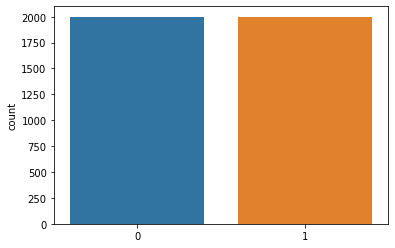

In [ ]:
sns.countplot(y_train);

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


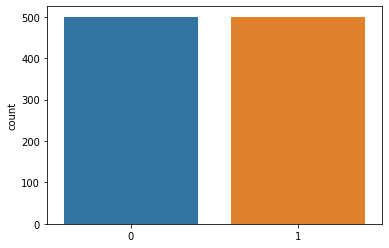

In [ ]:
sns.countplot(y_test);

### Normalizing the data

In [ ]:
X_train[0].max(), X_train[0].min()

(236, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train[0].max(), X_train[0].min()

(0.9254901960784314, 0.0)

In [ ]:
X_test[0].max(), X_test[0].min()

(1.0, -0.003937007874015748)

### Building and training the neural network

In [ ]:
(16384 + 2) / 2

8193.0

In [ ]:
# 16384 -> 8193 -> 8193 -> 1
network1 = tf.keras.models.Sequential()
network1.add(tf.keras.layers.Dense(input_shape=(16384,), units=8193, activation='relu'))
network1.add(tf.keras.layers.Dense(units=8193, activation = 'relu'))
network1.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [ ]:
network1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8193)              134242305 
_________________________________________________________________
dense_1 (Dense)              (None, 8193)              67133442  
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 8194      
Total params: 201,383,941
Trainable params: 201,383,941
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# https://keras.io/api/optimizers/
# https://keras.io/api/losses/
network1.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = network1.fit(X_train, y_train, epochs=10)

Epoch 1/10
125/125 [==============================] - 170s 1s/step - loss: 14.4114 - accuracy: 0.5144
Epoch 2/10
125/125 [==============================] - 169s 1s/step - loss: 0.7349 - accuracy: 0.5238
Epoch 3/10
125/125 [==============================] - 169s 1s/step - loss: 0.6803 - accuracy: 0.5679
Epoch 4/10
125/125 [==============================] - 171s 1s/step - loss: 0.6791 - accuracy: 0.5655
Epoch 5/10
125/125 [==============================] - 169s 1s/step - loss: 0.6909 - accuracy: 0.5120
Epoch 6/10
125/125 [==============================] - 169s 1s/step - loss: 0.6935 - accuracy: 0.4875
Epoch 7/10
125/125 [==============================] - 171s 1s/step - loss: 0.7015 - accuracy: 0.5000
Epoch 8/10
125/125 [==============================] - 169s 1s/step - loss: 0.6982 - accuracy: 0.4923
Epoch 9/10
125/125 [==============================] - 169s 1s/step - loss: 0.6931 - accuracy: 0.5167
Epoch 10/10
125/125 [==============================] - 169s 1s/step - loss: 0.6932 - accur

### Evaluating the neural network

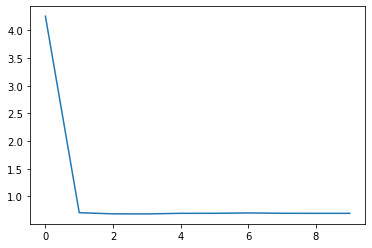

In [ ]:
plt.plot(history.history['loss']);

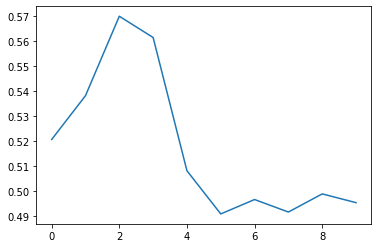

In [ ]:
plt.plot(history.history['accuracy']);

In [ ]:
X_test.shape

(1000, 16384)

In [ ]:
predictions = network1.predict(X_test)
predictions

array([[0.50035286],
       [0.50035286],
       [0.50035286],
       [0.50035286],
       [0.50035286],
       [0.50035286],
       [0.50035286],
       [0.50035286],
       [0.50035286],
       [0.50035286],
       [0.50035286],
       [0.50035286],
       [0.50035286],
       [0.50035286],
       [0.50035286],
       [0.50035286],
       [0.50035286],
       [0.50035286],
       [0.50035286],
       [0.50035286],
       [0.50035286],
       [0.50035286],
       [0.50035286],
       [0.50035286],
       [0.50035286],
       [0.50035286],
       [0.50035286],
       [0.50035286],
       [0.50035286],
       [0.50035286],
       [0.50035286],
       [0.50035286],
       [0.50035286],
       [0.50035286],
       [0.50035286],
       [0.50035286],
       [0.50035286],
       [0.50035286],
       [0.50035286],
       [0.50035286],
       [0.50035286],
       [0.50035286],
       [0.50035286],
       [0.50035286],
       [0.50035286],
       [0.50035286],
       [0.50035286],
       [0.500

In [ ]:
# 0 False - Bart
# 1 True  - Homer

In [ ]:
predictions = (predictions > 0.5)
predictions

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [ ]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.5

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[  0, 500],
       [  0, 500]])

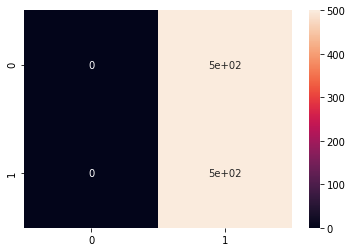

In [ ]:
sns.heatmap(cm, annot=True);

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       500
           1       0.50      1.00      0.67       500

    accuracy                           0.50      1000
   macro avg       0.25      0.50      0.33      1000
weighted avg       0.25      0.50      0.33      1000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
